# Libraries

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Typing
from typing import List

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler

## 1 Data Colllection

In [2]:
df = pd.read_csv('C:/Users/Nadir/Desktop/satisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160.0,5,4,...,5,5,5,5,2,5.0,5.0,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863.0,1,1,...,4,4,4,4,3,4.0,5.0,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192.0,2,0,...,2,4,1,3,2,2.0,2.0,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377.0,0,0,...,1,1,1,1,3,1.0,4.0,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182.0,2,3,...,2,2,2,2,4,2.0,4.0,0,20.0,satisfied


## 2 Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25810 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25626 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25521 non-null  float64
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Null values are in the following columns: Gender, Type of Travel, Flight Distance, Inflight service, Cleanliness & Arrival Delay in Minutes.

In [4]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25521.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25824.000000,25843.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1192.707496,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649241,3.286112,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.466147,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180211,1.319493,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,846.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [5]:
df.value_counts("satisfaction")

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64

Binary classification!

## 3 Data Cleaning
### Numerical Columns

In [6]:
# List of columns to fill missing values
columns_to_fill = ['Flight Distance', 'Inflight service', 'Cleanliness', 'Arrival Delay in Minutes']

# Alternatively, you can do it in a more concise way using the `apply` method
df[columns_to_fill] = df[columns_to_fill].apply(lambda x: x.fillna(int(x.mean())))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25810 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25626 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  float64
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [7]:
# List of satisfaaction columns
columns_to_tweak = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Inflight service', 'Cleanliness']

# Iterate over each column and set values to 3 where the value is 0
for column in columns_to_tweak:
    df.loc[df[column] == 0, column] = 3

### Object Columns
For object columns the rows containg missing values will be droped since they only represent a very small portion of the whole data:
* Given:
  - Total number of rows: 25,976
  - Gender has 166 missing values: 0.64%
  - Type of Travel has 350 missing values: 1.35%
* Let's assume the worst case where these missing values do not overlap:
  - Total rows potentially affected:  166 + 350 = 516
Percentage of total rows affected: ≈1.99%

In [8]:
# Drop rows where any value is missing
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25468 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25468 non-null  int64  
 1   id                                 25468 non-null  int64  
 2   Gender                             25468 non-null  object 
 3   Customer Type                      25468 non-null  object 
 4   Age                                25468 non-null  int64  
 5   Type of Travel                     25468 non-null  object 
 6   Class                              25468 non-null  object 
 7   Flight Distance                    25468 non-null  float64
 8   Inflight wifi service              25468 non-null  int64  
 9   Departure/Arrival time convenient  25468 non-null  int64  
 10  Ease of Online booking             25468 non-null  int64  
 11  Gate location                      25468 non-null  int64  


### Non-useful Columns
Columns values that are sequentially asigned numbers like in Unnamed: 0 and id should be deleted.

In [9]:
columns_to_drop = ['Unnamed: 0', 'id']
df = df.drop(columns=columns_to_drop)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160.0,5,4,3,4,...,5,5,5,5,2,5.0,5.0,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863.0,1,1,3,1,...,4,4,4,4,3,4.0,5.0,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192.0,2,3,2,4,...,2,4,1,3,2,2.0,2.0,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377.0,3,3,3,2,...,1,1,1,1,3,1.0,4.0,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182.0,2,3,4,3,...,2,2,2,2,4,2.0,4.0,0,20.0,satisfied


### Merging Delay Columns

In [10]:
# Override 'Departure Delay in Minutes' with 'Total Delay'
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

df.rename(columns={'Departure Delay in Minutes': 'Total Delay'}, inplace=True)

# Drop 'Arrival Delay in Minutes' column
df.drop(columns=['Arrival Delay in Minutes'], inplace=True)

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160.0,5,4,3,4,...,3,5,5,5,5,2,5.0,5.0,94.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863.0,1,1,3,1,...,5,4,4,4,4,3,4.0,5.0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192.0,2,3,2,4,...,2,2,4,1,3,2,2.0,2.0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377.0,3,3,3,2,...,4,1,1,1,1,3,1.0,4.0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182.0,2,3,4,3,...,2,2,2,2,2,4,2.0,4.0,20.0,satisfied


## 4 String Data Transformation
### Binary Encoding for Binary Variables

In [11]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode binary columns
binary_columns = ['Gender', 'Customer Type', 'Type of Travel', 'satisfaction']
for column in binary_columns:
    df[column] = encoder.fit_transform(df[column])

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,satisfaction
0,0,0,52,0,Eco,160.0,5,4,3,4,...,3,5,5,5,5,2,5.0,5.0,94.0,1
1,0,0,36,0,Business,2863.0,1,1,3,1,...,5,4,4,4,4,3,4.0,5.0,0.0,1
2,1,1,20,0,Eco,192.0,2,3,2,4,...,2,2,4,1,3,2,2.0,2.0,0.0,0
3,1,0,44,0,Business,3377.0,3,3,3,2,...,4,1,1,1,1,3,1.0,4.0,6.0,1
4,0,0,49,0,Eco,1182.0,2,3,4,3,...,2,2,2,2,2,4,2.0,4.0,20.0,1


- Gender {0: Female, 1:Male}
- Customer Type {0: Loyal Customer, 1: disloyal Customer}
- Type of Travel {0: Business travel, 1: Personal Travel}
- satisfaction {0: satisfied, 1: neutral or dissatisfied}

### Ordinal Encoding for Class Column
Since there is a hierarchy among the categories. This means the categories have a clear ranking between: Economy, Economy Plus & Buisines classes.

In [12]:
# Define the order of classes for ordinal encoding
class_order = ['Eco', 'Eco Plus', 'Business']

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[class_order])

# Fit and transform the 'Class' column
df['Class'] = ordinal_encoder.fit_transform(df[['Class']])

# Convert encoded values to integer type
df['Class'] = df['Class'].astype(int)

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,satisfaction
0,0,0,52,0,0,160.0,5,4,3,4,...,3,5,5,5,5,2,5.0,5.0,94.0,1
1,0,0,36,0,2,2863.0,1,1,3,1,...,5,4,4,4,4,3,4.0,5.0,0.0,1
2,1,1,20,0,0,192.0,2,3,2,4,...,2,2,4,1,3,2,2.0,2.0,0.0,0
3,1,0,44,0,2,3377.0,3,3,3,2,...,4,1,1,1,1,3,1.0,4.0,6.0,1
4,0,0,49,0,0,1182.0,2,3,4,3,...,2,2,2,2,2,4,2.0,4.0,20.0,1


## 5 Data Visualization
### Box Plot

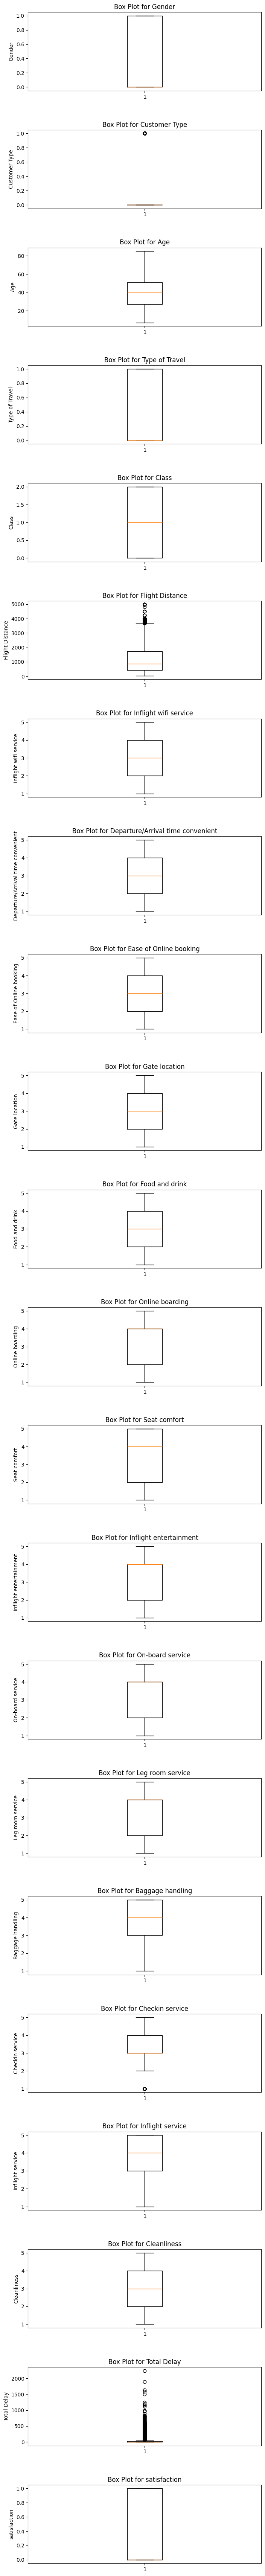

In [13]:
# Columns to check for outliers
columns_selection = df.columns

# Define a function to identify outliers using IQR method
def identify_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return (series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns_selection), ncols=1, figsize=(8, 4 * len(columns_selection)))
fig.subplots_adjust(hspace=0.5)

# Loop through each selected column
for i, column in enumerate(columns_selection):
    # Draw box plot
    axes[i].boxplot(df[column])
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

# Show the box plots and outliers
plt.show()

Box plot shows that there are outliers within the date.
### Histograms

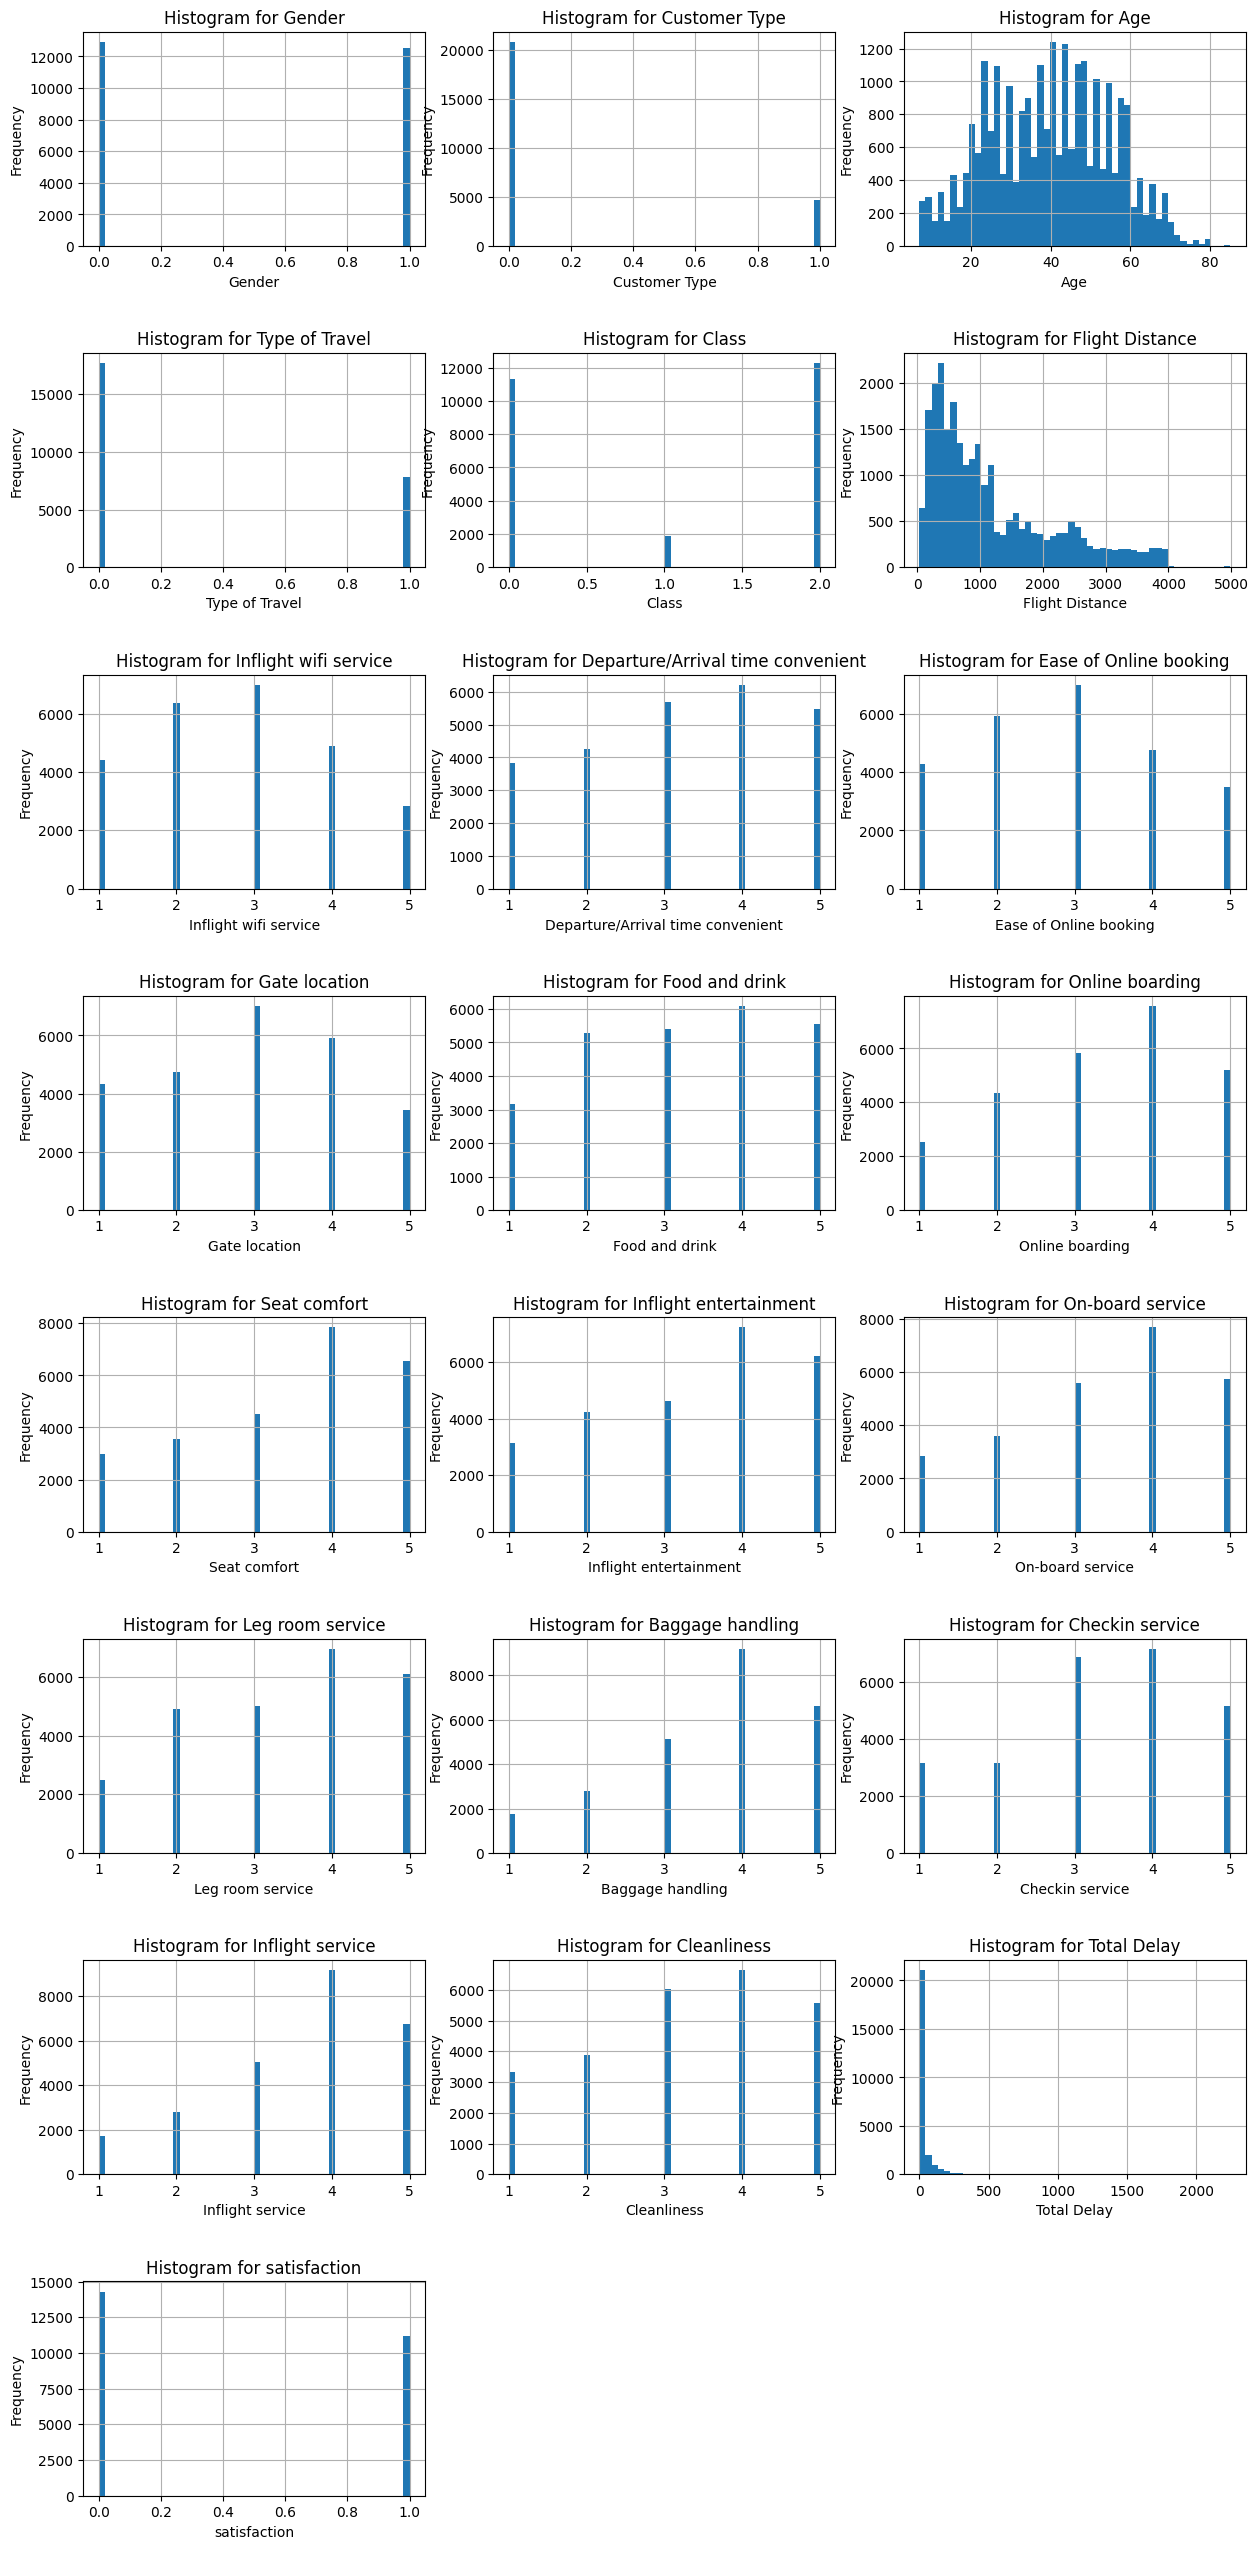

In [14]:
# Calculate the number of rows and columns for subplots
num_columns = 3
num_rows = math.ceil(len(columns_selection) / num_columns)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Loop through each selected column
for i, column in enumerate(columns_selection):
    row_num = i // num_columns
    col_num = i % num_columns

    # Plot histogram with bins=50
    df[column].hist(bins=50, ax=axes[row_num, col_num])
    axes[row_num, col_num].set_title(f'Histogram for {column}')
    axes[row_num, col_num].set_xlabel(column)
    axes[row_num, col_num].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(columns_selection), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

# Show the histograms
plt.show()

### Correlation Matrix

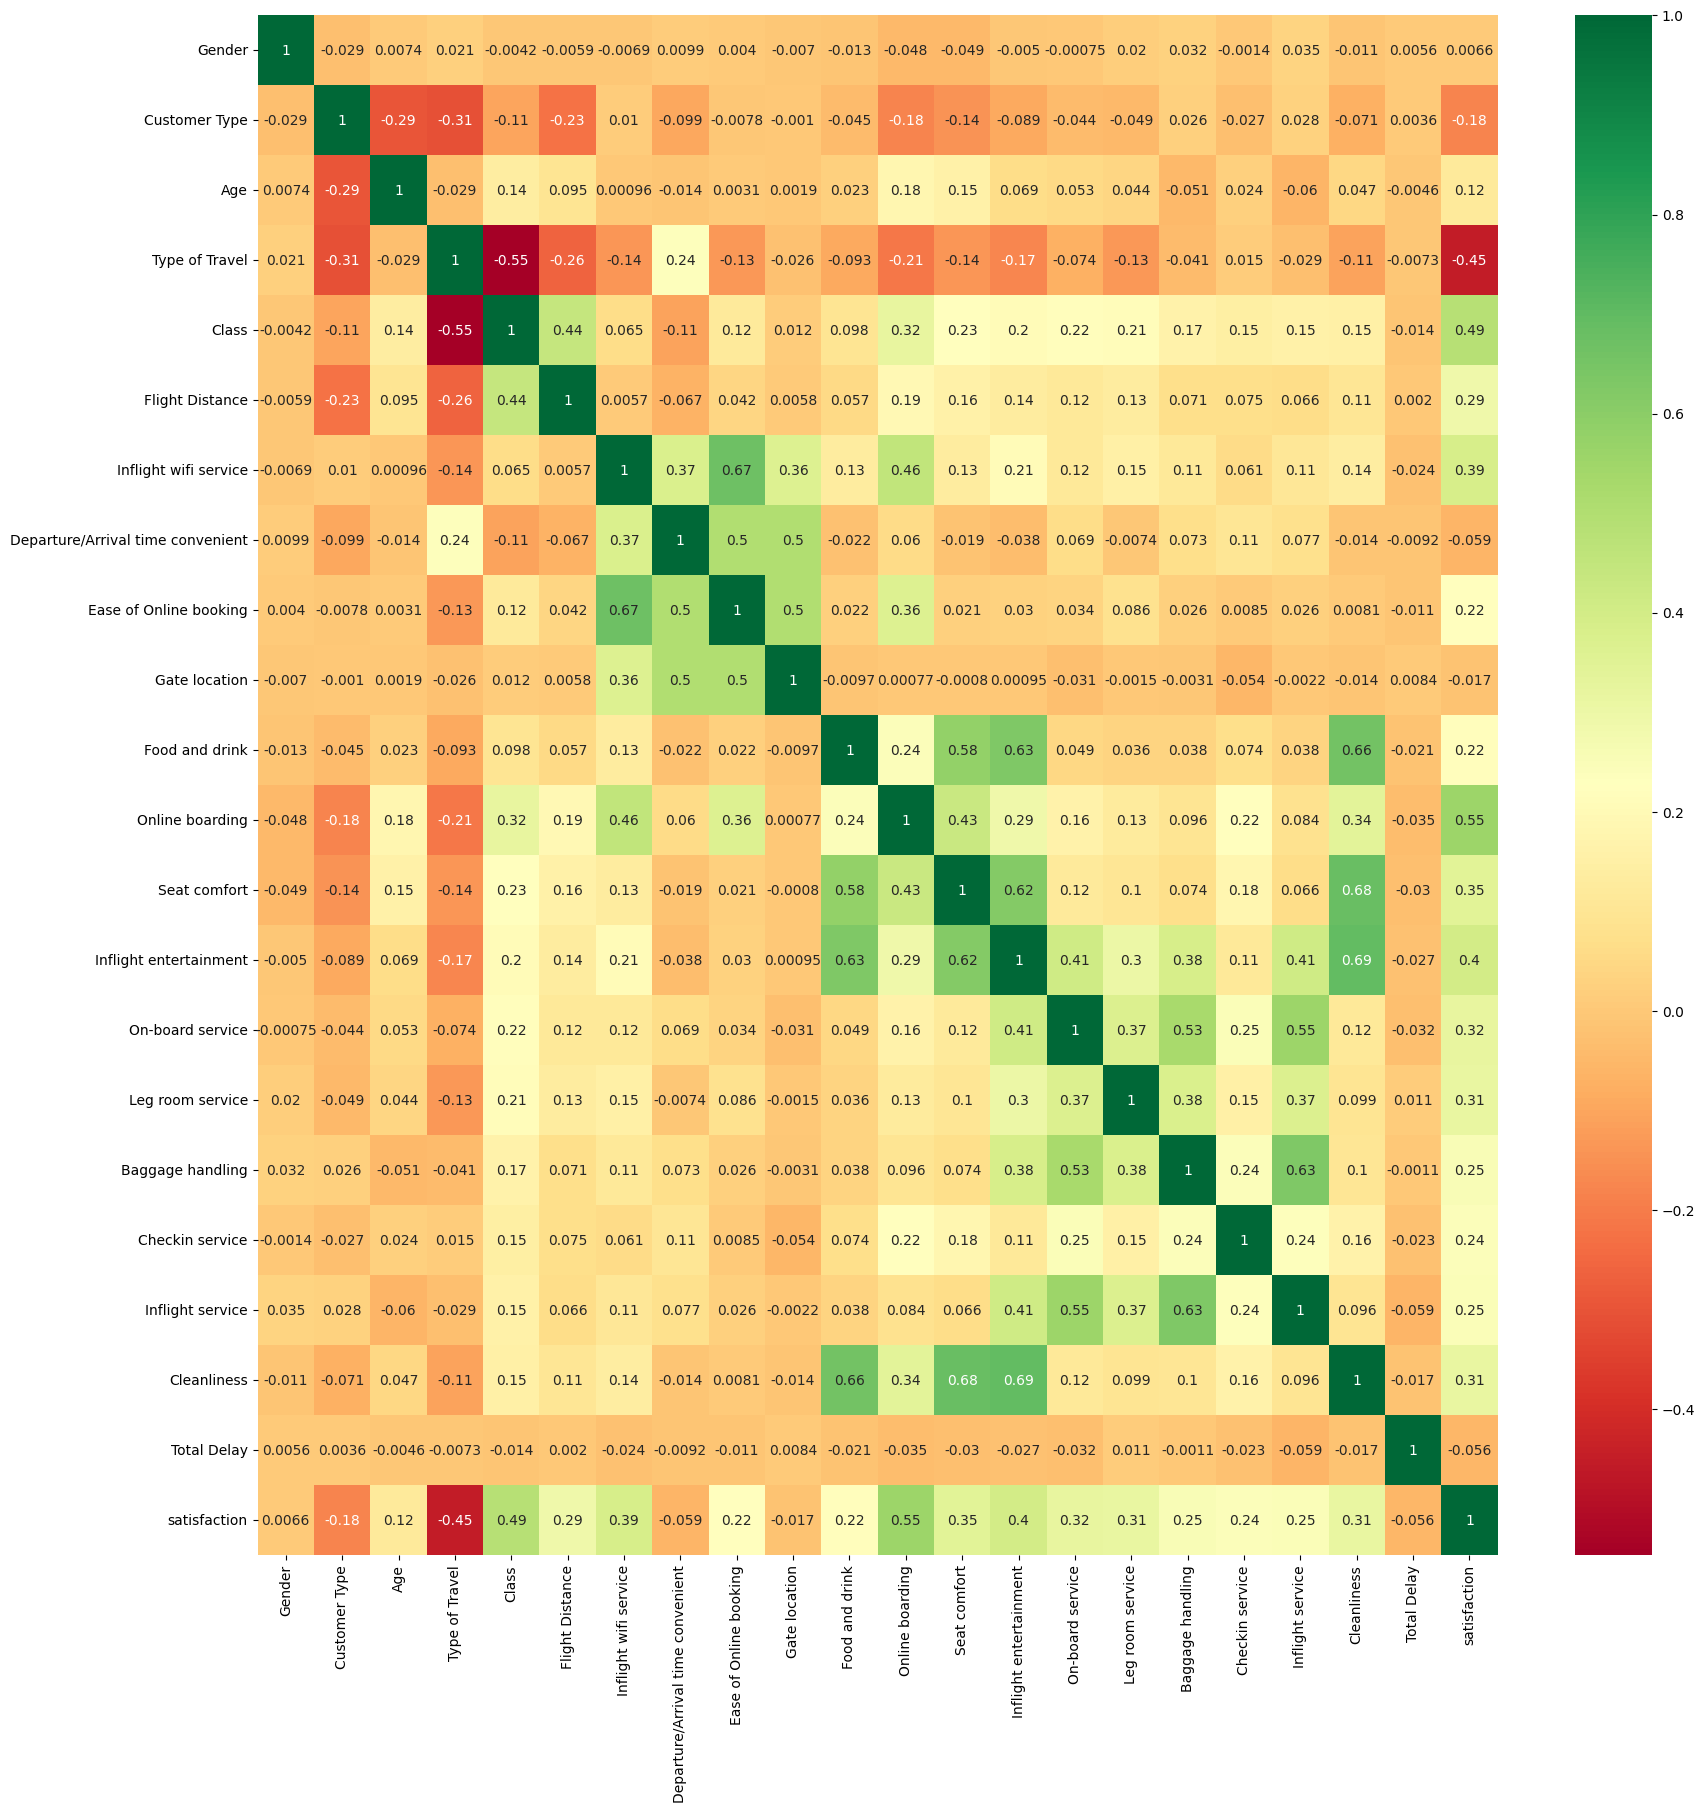

In [15]:
# calculate correlation matrix
corrmat = df.corr()

# select column names for plotting
top_corr_features = corrmat.index

# plot heat map
plt.figure(figsize=(20, 20))
g = sns.heatmap(corrmat[top_corr_features].loc[top_corr_features], annot=True, cmap="RdYlGn")
plt.show()

The correlation Matrix shows that there is:
- Moderate negative relationship between "Type of travel" and the target column "Satisfaction" (-0.45): meaning that when "Type of travel" is 0 (Business travel) the passenger is satisfied and when it's 1 (Personal travel) their satisfaction is often neutral or dissatisfied.
- Moderate positive relationship between "Class, Online boarding" and the target column "satisfaction" (0.49 & 0.55).
- Weak positive relationship between "Inflight entertainement, Seat comfort, On-boarding service, Leg room service & Cleanliness" and the target column "satisfaction" (0.4, 0.35, 0.32, 0.31 & 0.31 respectively).

## 6 Feature Scaling
Since outliers (anomalies) were observed within the data, as indicated by the box plot, StandardScaler will be used for dimensionality reduction.

In [16]:
# Extract the other column names (excluding the last one)
columns_to_scale = df.columns[:-1]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standard scale the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the DataFrame
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,satisfaction
0,-0.985344,-0.475348,0.817874,-0.664253,-1.077964,-1.043130,1.756919,0.587624,0.083904,0.798600,...,-0.341221,1.227170,1.259165,1.261068,1.162371,-1.034961,1.149963,1.302583,0.876484,1
1,-0.985344,-0.475348,-0.239923,-0.664253,1.001932,1.688678,-1.462277,-1.628957,0.083904,-1.541788,...,1.173810,0.480031,0.478608,0.490583,0.312703,-0.247179,0.301451,1.302583,-0.391302,1
2,1.014874,2.103723,-1.297721,-0.664253,-1.077964,-1.010789,-0.657478,-0.151236,-0.699404,0.798600,...,-1.098737,-1.014246,0.478608,-1.820871,-0.536964,-1.034961,-1.395575,-0.975655,-0.391302,0
3,1.014874,-0.475348,0.288975,-0.664253,1.001932,2.208156,0.147321,-0.151236,0.083904,-0.761659,...,0.416295,-1.761385,-1.863064,-1.820871,-2.236298,-0.247179,-2.244087,0.543170,-0.310380,1
4,-0.985344,-0.475348,0.619537,-0.664253,-1.077964,-0.010238,-0.657478,-0.151236,0.867212,0.018471,...,-1.098737,-1.014246,-1.082507,-1.050386,-1.386631,0.540602,-1.395575,0.543170,-0.121561,1


## 7 Data Pipeline

In [17]:
# Data Collection
df = pd.read_csv('C:/Users/Nadir/Desktop/satisfaction.csv')

# List of columns to fill missing values
columns_to_fill = ['Flight Distance', 'Inflight service', 'Cleanliness', 'Arrival Delay in Minutes']
# Alternatively, you can do it in a more concise way using the `apply` method
df[columns_to_fill] = df[columns_to_fill].apply(lambda x: x.fillna(int(x.mean())))

# List of satisfaaction columns
columns_to_tweak = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Inflight service', 'Cleanliness']
# Iterate over each column and set values to 3 where the value is 0
for column in columns_to_tweak:
    df.loc[df[column] == 0, column] = 3

# Drop rows where any value is missing
df = df.dropna()
columns_to_drop = ['Unnamed: 0', 'id']
df = df.drop(columns=columns_to_drop)

# Override 'Departure Delay in Minutes' with 'Total Delay'
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']
df.rename(columns={'Departure Delay in Minutes': 'Total Delay'}, inplace=True)
# Drop 'Arrival Delay in Minutes' column
df.drop(columns=['Arrival Delay in Minutes'], inplace=True)

# Initialize the LabelEncoder
encoder = LabelEncoder()
# Encode binary columns
binary_columns = ['Gender', 'Customer Type', 'Type of Travel', 'satisfaction']
for column in binary_columns:
    df[column] = encoder.fit_transform(df[column])

# Define the order of classes for ordinal encoding
class_order = ['Eco', 'Eco Plus', 'Business']
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[class_order])
# Fit and transform the 'Class' column
df['Class'] = ordinal_encoder.fit_transform(df[['Class']])
# Convert encoded values to integer type
df['Class'] = df['Class'].astype(int)

# Extract the other column names (excluding the last one)
columns_to_scale = df.columns[:-1]
# Initialize the StandardScaler
scaler = StandardScaler()
# Standard scale the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,satisfaction
0,-0.985344,-0.475348,0.817874,-0.664253,-1.077964,-1.043130,1.756919,0.587624,0.083904,0.798600,...,-0.341221,1.227170,1.259165,1.261068,1.162371,-1.034961,1.149963,1.302583,0.876484,1
1,-0.985344,-0.475348,-0.239923,-0.664253,1.001932,1.688678,-1.462277,-1.628957,0.083904,-1.541788,...,1.173810,0.480031,0.478608,0.490583,0.312703,-0.247179,0.301451,1.302583,-0.391302,1
2,1.014874,2.103723,-1.297721,-0.664253,-1.077964,-1.010789,-0.657478,-0.151236,-0.699404,0.798600,...,-1.098737,-1.014246,0.478608,-1.820871,-0.536964,-1.034961,-1.395575,-0.975655,-0.391302,0
3,1.014874,-0.475348,0.288975,-0.664253,1.001932,2.208156,0.147321,-0.151236,0.083904,-0.761659,...,0.416295,-1.761385,-1.863064,-1.820871,-2.236298,-0.247179,-2.244087,0.543170,-0.310380,1
4,-0.985344,-0.475348,0.619537,-0.664253,-1.077964,-0.010238,-0.657478,-0.151236,0.867212,0.018471,...,-1.098737,-1.014246,-1.082507,-1.050386,-1.386631,0.540602,-1.395575,0.543170,-0.121561,1
